### Prepare data

In [138]:
library(sqldf)
library(ggplot2)

Download csv data from github

In [139]:
airq25<-read.csv("https://raw.githubusercontent.com/Maplub/AirQualityData/master/PM2-5_2018_daily.csv")
airq10<-read.csv("https://raw.githubusercontent.com/Maplub/AirQualityData/master/PM10_2018_daily.csv")

Change column names

In [140]:
colnames(airq25)<-c("id","da","pm25")
colnames(airq10)<-c("id","da","pm10")

Join PM2.5 and PM10 Table

In [141]:
airq<-sqldf("select a.id,a.da,a.pm25,b.pm10 from airq25 a, airq10 b where a.id=b.id and a.da=b.da")

In [142]:
head(airq)

id,da,pm25,pm10
CU-S0005,2018-02-07,45.86923,56.26923
CU-S0005,2018-02-07,45.86923,56.30913
CU-S0006,2018-02-07,46.12795,57.23636
CU-S0006,2018-02-07,46.12795,58.32144
CU-S0009,2018-02-07,46.32250,57.90004
CU-S0009,2018-02-07,46.32250,59.60125


There is one SOO94 (O not 0) row. Just remove it

In [143]:
airq<-airq[!grepl("CU-SOO94", airq$id),]

Read sensorlist from file. Set to UTF-8.

In [144]:
sensorlist<-read.csv("sensorlist.csv",encoding="UTF-8", stringsAsFactors=FALSE)
sensorlist[]     <- lapply(sensorlist, as.character)
Encoding(sensorlist$tambol)

[1] "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8"
[10] "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8"
[19] "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8"
[28] "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8"
[37] "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8"
[46] "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8"
[55] "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8"
[64] "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8"
[73] "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8"
[82] "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8"
[91] "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8"

Change da column to Date format

In [145]:
airq$date<-as.Date(airq$da,"%Y-%m-%d")

To use code from the previous year, separate day, month, and year.

In [146]:
airq$d<-as.numeric(format(airq$date,'%d'))
airq$m<-as.numeric(format(airq$date,'%m'))
airq$y<-as.numeric(format(airq$date,'%Y'))

Calculate day of year

In [147]:
airq$doy <- strftime(airq$date, format = "%j")
airq$doy<-as.numeric(airq$doy)

Remove NA rows.

In [148]:
airq<-na.omit(airq)

Give the label to month, save it as monthf

In [149]:
airq$monthf<-factor(airq$m,levels=as.character(1:12),labels=c("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"),ordered=TRUE)

Get week of year from date

In [150]:
airq$woy<-as.numeric(format(airq$date,"%W"))

Below is the code from the previous year. I forget what it is.

In [151]:
library(plyr)
airq<-ddply(airq,.(m),transform,monthweek=1+woy-min(woy))

In [152]:
airq$dow<-as.POSIXlt(airq$date)$wday

In [153]:
airq$dowf<-factor(airq$dow,levels=rev(0:6),labels=rev(c("Sun","Mon","Tue","Wed","Thu","Fri","Sat")),ordered=TRUE)

In [154]:
airq$y

[1] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
  [15] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
  [29] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
  [43] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
  [57] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
  [71] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
  [85] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
  [99] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [113] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [127] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [141] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [155] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [169] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [183] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [197] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [211] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [225] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [239] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [253] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [267] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [281] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [295] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [309] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [323] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [337] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [351] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [365] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [379] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [393] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [407] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [421] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [435] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [449] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [463] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [477] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [491] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [505] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [519] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [533] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [547] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [561] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [575] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [589] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [603] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [617] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [631] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [645] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [659] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [673] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [687] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [701] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018
 [715] 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018

In [155]:
maxpm25<-max(airq$pm25)
airq$pm25f<-cut(airq$pm25,c(0, 15, 40, 65, 150,maxpm25))

In [156]:
sqldf('select distinct(pm25f) from airq')

pm25f
"(40,65]"
"(15,40]"
"(65,150]"
"(0,15]"
NA
"(150,2.51e+03]"


### And finally! I can plot it.

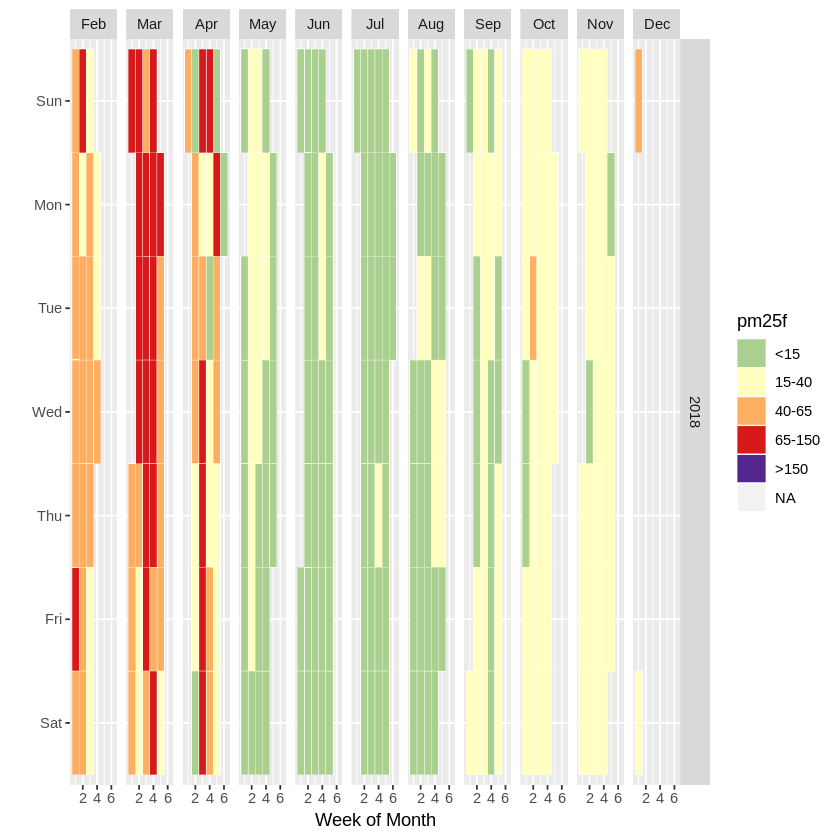

In [157]:
ggplot(airq, aes(monthweek,dowf)) + geom_tile(aes(fill = pm25f),colour = "white") + scale_fill_manual(values=c("#A9D08E","#ffffbf","#fdae61","#d7191c","#54278f"),labels = c("<15","15-40","40-65","65-150",">150"))+ facet_grid(y~monthf) + xlab("Week of Month") + ylab("")

In [166]:
maxpm10<-max(airq$pm10)
airq$pm10f<-cut(airq$pm10,c(0,50,100,200,300,maxpm10))

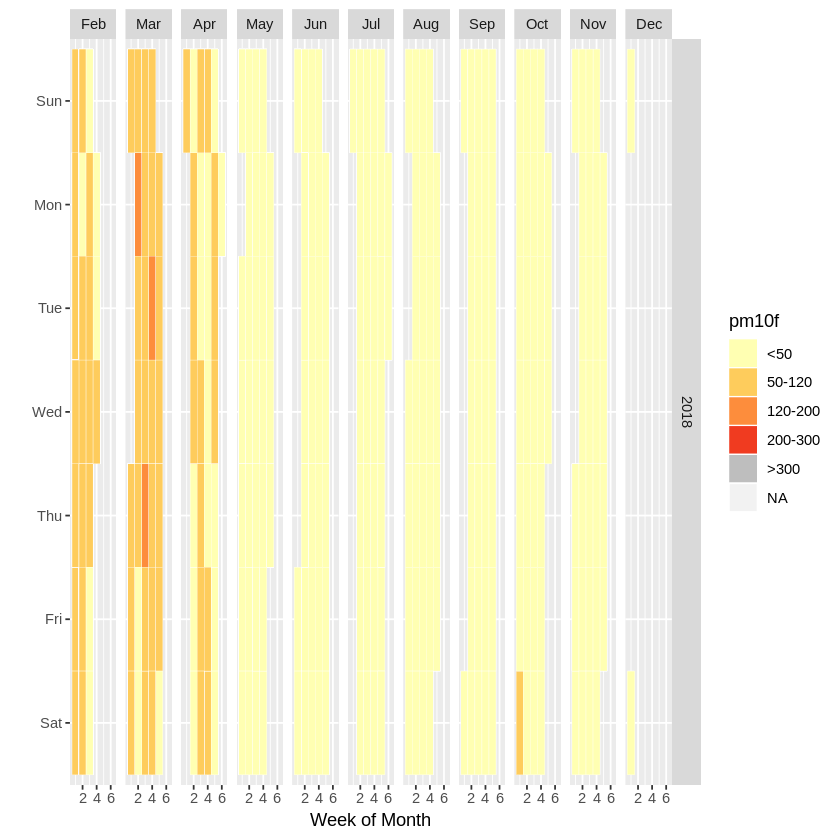

In [168]:
ggplot(airq, aes(monthweek,dowf)) + geom_tile(aes(fill = pm10f),colour = "white") + scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","grey"),labels = c("<50","50-120","120-200","200-300",">300"))+ facet_grid(y~monthf) + xlab("Week of Month") + ylab("")

Bind it with sensorlist to get Tambol name

In [160]:
airq<-sqldf("select a.*,s.tambol,s.amphoe from airq a, sensorlist s where a.id=s.sensorid")

In [161]:
maxpm25<-max(airq$pm10)
maxpm10<-max(airq$pm10)
airq$pm25cat<-cut(airq$pm25,c(0, 15, 40, 65, 150,maxpm25))
airq$pm10cat<-cut(airq$pm10,c(0,50,100,200,300,maxpm10))

In [162]:
head(airq)

id,da,pm25,pm10,date,d,m,y,doy,monthf,woy,monthweek,dow,dowf,pm25f,tambol,amphoe,pm25cat,pm10cat
CU-S0005,2018-02-07,45.86923,56.26923,2018-02-07,7,2,2018,38,Feb,6,1,3,Wed,"(40,65]",ป่าคาหลวง,ท่าวังผา,"(40,65]","(50,100]"
CU-S0005,2018-02-07,45.86923,56.30913,2018-02-07,7,2,2018,38,Feb,6,1,3,Wed,"(40,65]",ป่าคาหลวง,ท่าวังผา,"(40,65]","(50,100]"
CU-S0006,2018-02-07,46.12795,57.23636,2018-02-07,7,2,2018,38,Feb,6,1,3,Wed,"(40,65]",พระธาตุ,เชียงกลาง,"(40,65]","(50,100]"
CU-S0006,2018-02-07,46.12795,58.32144,2018-02-07,7,2,2018,38,Feb,6,1,3,Wed,"(40,65]",พระธาตุ,เชียงกลาง,"(40,65]","(50,100]"
CU-S0009,2018-02-07,46.32250,57.90004,2018-02-07,7,2,2018,38,Feb,6,1,3,Wed,"(40,65]",ปิงหลวง,นาหมื่น,"(40,65]","(50,100]"
CU-S0009,2018-02-07,46.32250,59.60125,2018-02-07,7,2,2018,38,Feb,6,1,3,Wed,"(40,65]",ปิงหลวง,นาหมื่น,"(40,65]","(50,100]"


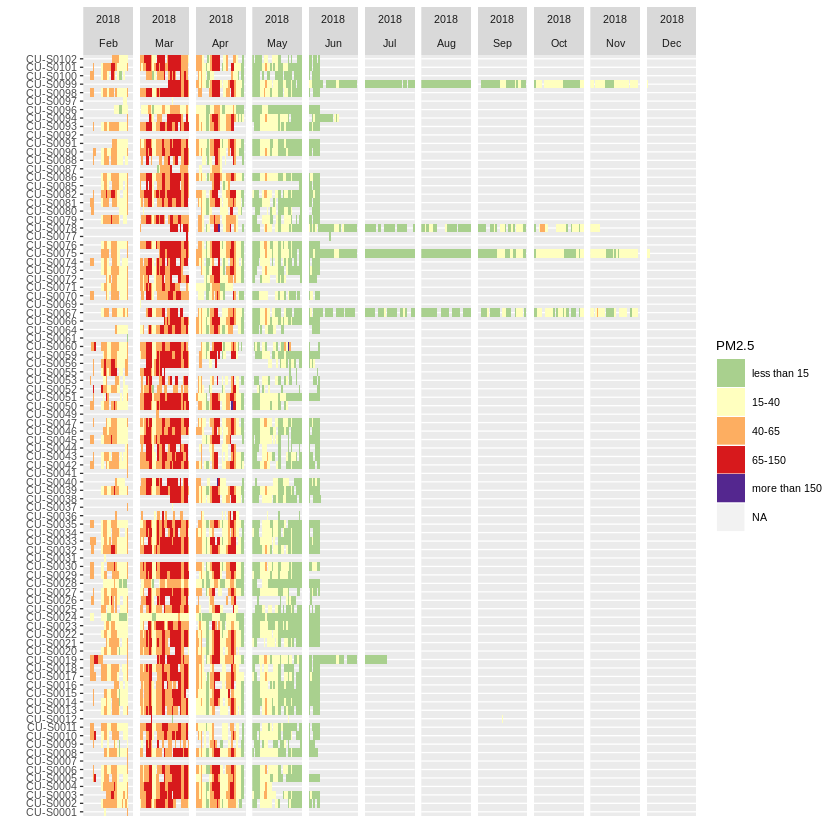

In [169]:
p<-ggplot(airq, aes(d,id)) +geom_tile(aes(fill = pm25cat))+facet_grid(.~ y+monthf)+ scale_fill_manual(guide = guide_legend(title = "PM2.5"),values=c("#A9D08E","#ffffbf","#fdae61","#d7191c","#54278f"),labels = c("less than 15","15-40","40-65","65-150","more than 150"))
base_size<-8
p +theme_grey(base_size = base_size) + labs(x = "",y = "") + scale_x_discrete(expand = c(0, 0)) +
scale_y_discrete(expand = c(0, 0))

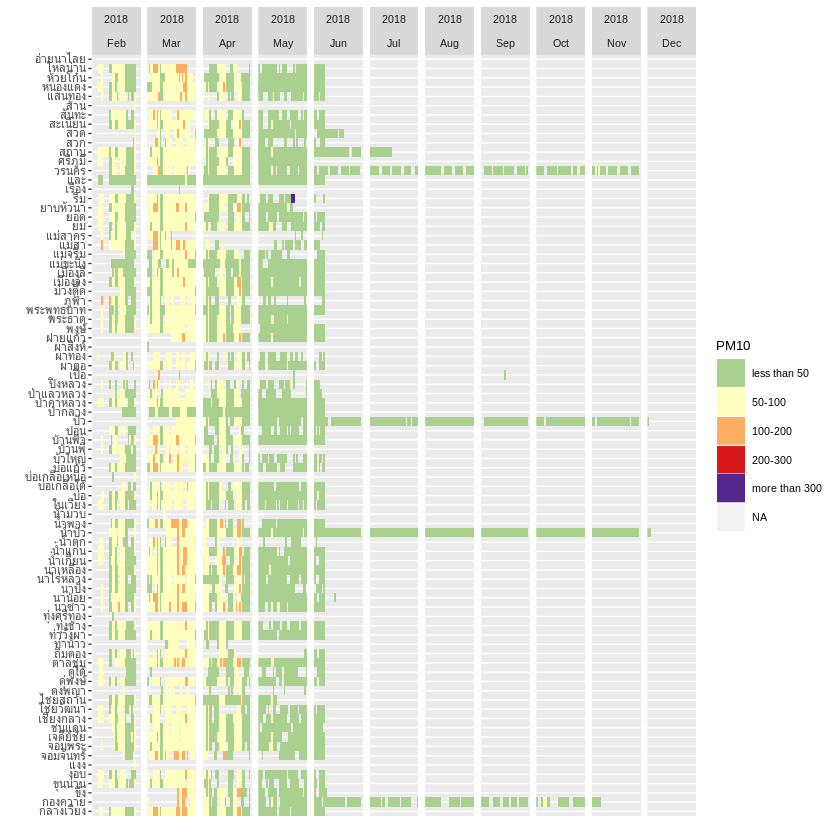

In [164]:
p<-ggplot(airq, aes(d,tambol)) +geom_tile(aes(fill = pm10cat))+facet_grid(.~ y+monthf)+ scale_fill_manual(guide = guide_legend(title = "PM10"),values=c("#A9D08E","#ffffbf","#fdae61","#d7191c","#54278f"),labels = c("less than 50","50-100","100-200","200-300","more than 300"))
base_size<-8
p +theme_grey(base_size = base_size) + labs(x = "",y = "") + scale_x_discrete(expand = c(0, 0)) +
scale_y_discrete(expand = c(0, 0))